In [154]:
%matplotlib inline
from Dataframes import *
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('OverallResults.csv', dtype = {'Crawler Type': str, 'Parallel Method': str,'Workers': int, 'Decay Coefficient': float, 'Inheritance Coefficient': float, 'Time': int, 'Total Images': int})
df = df.dropna() # Removes any null rows
df = df.replace(',','', regex=True) # Removes all commas in numbers
display(df.head())

,Crawler Type,Parallel Method,Workers,Decay Coefficient,Inheritance Coefficient,Time,Total Images,Total Scraped
0,Incremental,Threading,8,0.9,0.1,43200,19786,5584
1,Incremental,Threading,8,0.9,0.1,42900,19745,5533
2,Incremental,Threading,8,0.9,0.1,42600,19610,5504
3,Incremental,Threading,8,0.9,0.1,42300,19420,5472
4,Incremental,Threading,8,0.9,0.1,42000,19351,5448


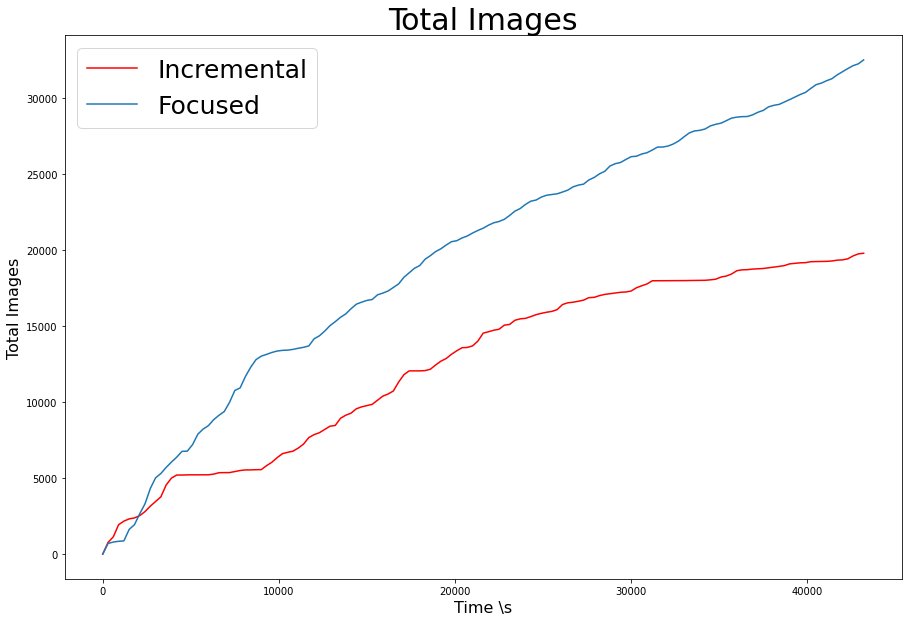

In [155]:
time = df.loc[df['Crawler Type'] == 'Focused']['Time'].to_list()
incremental_total = df.loc[df['Crawler Type'] == 'Incremental']['Total Images'].to_list()
focused_total = df.loc[df['Crawler Type'] == 'Focused']['Total Images'].to_list()

plt.figure(figsize=(15,10))
plt.title('Total Images', fontsize=30)
plt.plot(time, incremental_total, label = "Incremental", color='red')
plt.plot(time, focused_total, label = "Focused")
plt.xlabel('Time \s', fontsize=16)
plt.ylabel('Total Images', fontsize=16)
plt.legend(fontsize=25)
plt.show()

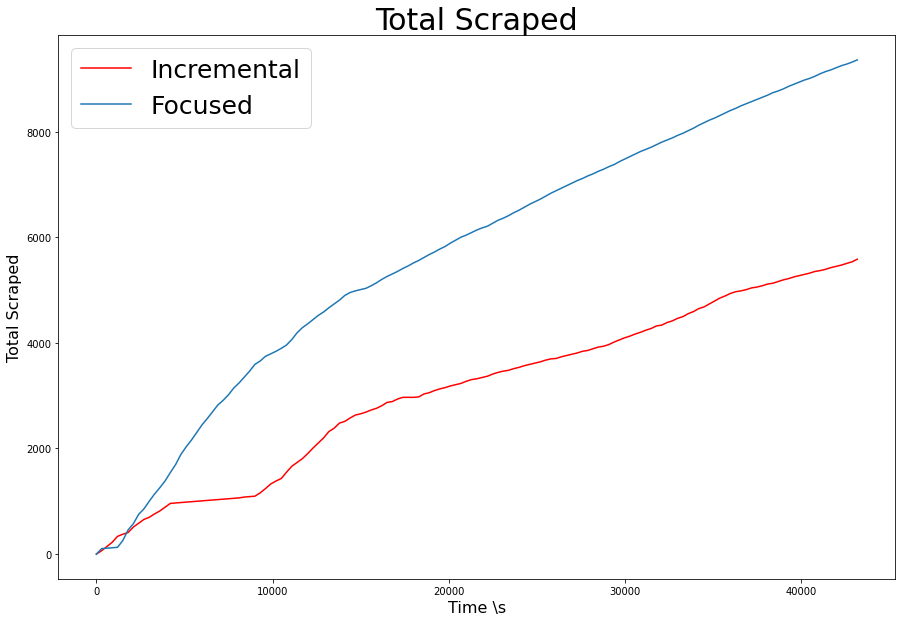

In [156]:
time = df.loc[df['Crawler Type'] == 'Focused']['Time'].to_list()
incremental_scraped = df.loc[df['Crawler Type'] == 'Incremental']['Total Scraped'].to_list()
focused_scraped = df.loc[df['Crawler Type'] == 'Focused']['Total Scraped'].to_list()

plt.figure(figsize=(15,10))
plt.title('Total Scraped', fontsize=30)
plt.plot(time, incremental_scraped, label = "Incremental", color='red')
plt.plot(time, focused_scraped, label = "Focused")
plt.xlabel('Time \s', fontsize=16)
plt.ylabel('Total Scraped', fontsize=16)
plt.legend(fontsize=25)
plt.show()

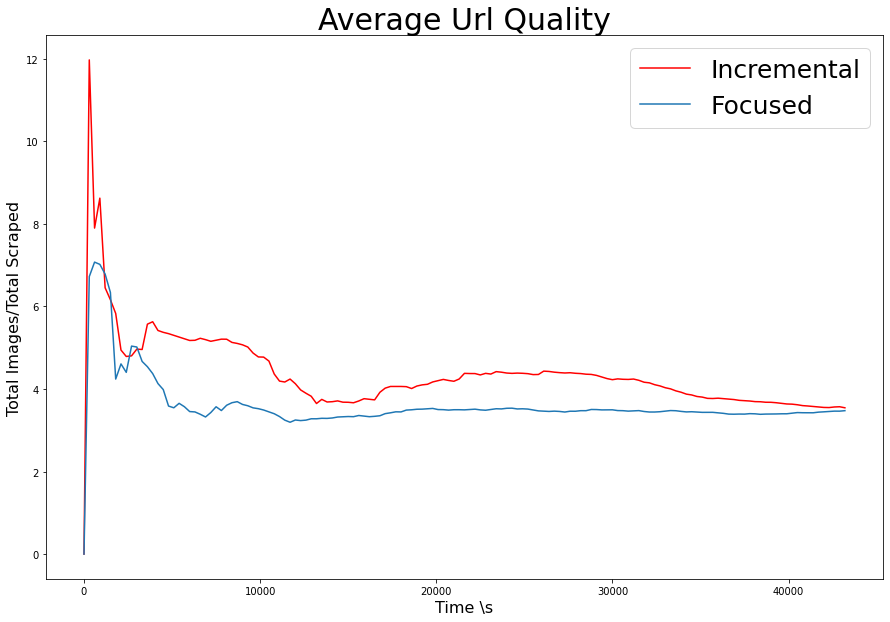

In [157]:
incremental_scraped[len(incremental_scraped)-1] = 1
focused_scraped[len(focused_scraped)-1] = 1
inc_tot_scr = [i / j for i, j in zip(incremental_total, incremental_scraped)]
foc_tot_scr = [i / j for i, j in zip(focused_total, focused_scraped)]
plt.figure(figsize=(15,10))
plt.title('Average Url Quality', fontsize=30)
plt.plot(time, inc_tot_scr, label = "Incremental", color='red')
plt.plot(time, foc_tot_scr, label = "Focused")
plt.xlabel('Time \s', fontsize=16)
plt.ylabel('Total Images/Total Scraped', fontsize=16)
plt.legend(fontsize=25)
plt.show()
